<a href="https://colab.research.google.com/github/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/blob/main/Modulo_09_Clasificacion/BA_Clasificacion_02_Sklearn_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

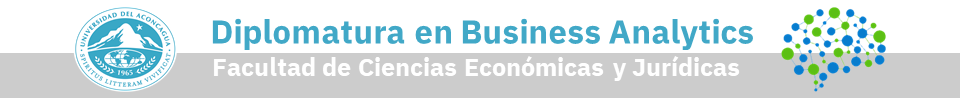

</center>

<center>
<font color="#41a8c7">
<h2><b>
Clasificación Scikit-learn

</font>
</center>

## Carga de librerías necesarias

In [ ]:
import pandas as pd #para la creación del dataframe y limpieza de los datos
import sklearn #para los algoritmos de aprendizaje automático
import sklearn.metrics as metrics #para la medición de los algoritmos
import matplotlib.pyplot as plt #librería gráfica básica
import pickle #para grabar y recuperar los modelos entrenados
import os

## Ingeniería de las características de los Datos

### Extracción de Datos - Creación del DataFrame

In [ ]:
url = "https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Modulo_09_Clasificacion/"

In [ ]:
archivo = "clientes02.csv"

In [ ]:
clientes = pd.read_csv(url+archivo) #los datos están separados por comas
clientes #vista del dataframe

,ID,Trabajo,Edad,Salario,Compra
0,0,Dependiente,19,19000,No
1,1,Dependiente,35,20000,No
2,2,Independiente,26,43000,No
3,3,Independiente,27,57000,No
4,4,Dependiente,19,76000,No
...,...,...,...,...,...
395,395,Independiente,46,41000,Si
396,396,Dependiente,51,23000,Si
397,397,Independiente,50,20000,Si
398,398,Dependiente,36,33000,No


El dataframe contiene 5 variables y 400 observaciones.

Las variables indican:
- **ID:** La identificación del cliente
- **Trabajo:** Si es en relación de Dependencia o es Independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

El problema a resolver es con los datos historicos (entrenamiento) predecir en virtud de las variables independientes, si un cliente va a efectuar una compra.

### Selección de características

In [ ]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    object
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


Podemos constatar que no hay valores nulos, ya que todas las columnas tienen la misma cantidad de datos, pero lo que no podemos constatar es si hay valores duplicados...

Ahora vamos a eliminar la variable o columna que no es pertinente para el problema planteado...

In [ ]:
clientes.drop_duplicates(inplace=True)
clientes.shape

(400, 5)

In [ ]:
clientes = clientes.drop(columns=["ID"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Trabajo,Edad,Salario,Compra
0,Dependiente,19,19000,No
1,Dependiente,35,20000,No
2,Independiente,26,43000,No
3,Independiente,27,57000,No
4,Dependiente,19,76000,No
...,...,...,...,...
395,Independiente,46,41000,Si
396,Dependiente,51,23000,Si
397,Independiente,50,20000,Si
398,Dependiente,36,33000,No


### Codificación One-Hot

Muchos algoritmos de aprendizaje automático requieren que todas las funciones sean variables continuas. Significa que si algunas de las características son categoricas, necesitamos encontrar una estrategia para convertirlas en variables continuas. La codificación one-hot es una de las formas más efectivas de realizar esta transformación. 

Para este caso en particular, la única variable categorica que tenemos es Trabajo. La vamos a convertir en una variable continua usando codificación one-hot

In [ ]:
codificacion = sklearn.preprocessing.OneHotEncoder()

In [ ]:
codificacion.fit(clientes.iloc[:,[0]])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [ ]:
matriz = codificacion.transform(clientes.iloc[:,[0]]).toarray()

In [ ]:
trabajo = pd.DataFrame({"Dependiente": matriz[:, 0], "Independiente": matriz[:, 1]})

In [ ]:
trabajo

,Dependiente,Independiente
0,1.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
395,0.0,1.0
396,1.0,0.0
397,0.0,1.0
398,1.0,0.0


In [ ]:
clientes = pd.concat([trabajo, clientes.iloc[:,1:]], axis=1, sort=False)

In [ ]:
clientes

,Dependiente,Independiente,Edad,Salario,Compra
0,1.0,0.0,19,19000,No
1,1.0,0.0,35,20000,No
2,0.0,1.0,26,43000,No
3,0.0,1.0,27,57000,No
4,1.0,0.0,19,76000,No
...,...,...,...,...,...
395,0.0,1.0,46,41000,Si
396,1.0,0.0,51,23000,Si
397,0.0,1.0,50,20000,Si
398,1.0,0.0,36,33000,No


## División del dataframe

Primero se divide el dataframe en variable objetivo $y$ con la columna que contiene los datos etiquetados por un lado, y en vector de entrada de los datos $X=$ con las variables restantes (variables independientes). 

In [ ]:
y = clientes["Compra"] #se define la variable objetivo
X = clientes.drop(columns=["Compra"]) #se elimina la variable objetivo del vector de entrada

In [ ]:
y #visualizando la variable objetivo

0      No
1      No
2      No
3      No
4      No
       ..
395    Si
396    Si
397    Si
398    No
399    Si
Name: Compra, Length: 400, dtype: object

In [ ]:
X #visualizando el vector de entrada

,Dependiente,Independiente,Edad,Salario
0,1.0,0.0,19,19000
1,1.0,0.0,35,20000
2,0.0,1.0,26,43000
3,0.0,1.0,27,57000
4,1.0,0.0,19,76000
...,...,...,...,...
395,0.0,1.0,46,41000
396,1.0,0.0,51,23000
397,0.0,1.0,50,20000
398,1.0,0.0,36,33000


Ahora se divide la variable objetivo $y$ en un conjunto de datos de entrenamiento (train) y prueba (test). Lo mismo se realiza para el vector de entrada de los datos $X$.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

La proporcion es 75% para entrenamiento y 25% para prueba

In [ ]:
X_train.shape

(300, 4)

De las 400 observaciones del vector de entrada de datos, 300 observaciones son de entrenamiento

In [ ]:
X_test.shape

(100, 4)

De las 400 observaciones del vector de entrada de datos, 100 observaciones son de prueba

In [ ]:
y_train.shape

(300,)

De las 400 observaciones de la variable objetivo, 300 observaciones son de entrenamiento

In [ ]:
y_test.shape

(100,)

De las 400 observaciones de la variable objetivo, 100 observaciones son de prueba

## Escala del vector de entrada

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
normalizacion = StandardScaler()

In [ ]:
X_train = normalizacion.fit_transform(X_train)
X_test = normalizacion.transform(X_test)

# Evaluando los Algoritmos

## Algoritmo Árbol de Decisión

In [ ]:
from sklearn import tree

In [ ]:
ad = sklearn.tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=2)

In [ ]:
ad.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [ ]:
y_pred_ad = ad.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_ad)
print(mc)

[[64  4]
 [ 2 30]]


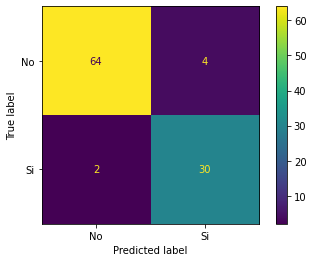

In [ ]:
metrics.plot_confusion_matrix(ad,X_test,y_test)

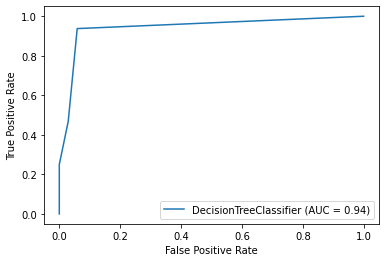

In [ ]:
metrics.plot_roc_curve(ad,X_test,y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_ad)
print(reporte)

              precision    recall  f1-score   support

          No       0.97      0.94      0.96        68
          Si       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



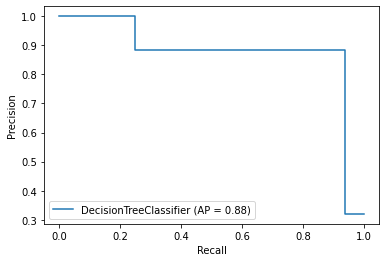

In [ ]:
metrics.plot_precision_recall_curve(ad,X_test,y_test)

### Guardando el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_arbol_decision.pkl"

In [ ]:
file = open(path, "wb")
pickle.dump(ad, file)

### Leyendo el modelo

In [ ]:
file = open(path, "rb")
modelo_ad = pickle.load(file)

### Visualización Árbol de Decisión

In [ ]:
variables = ["Independiente","Dependiente","Edad","Salario"]
compra = ["No","Si"]

[Text(223.2, 362.4, 'Edad <= 0.631\nentropy = 0.951\nsamples = 300\nvalue = [189, 111]\nclass = No'),
 Text(111.6, 217.44, 'Salario <= 0.606\nentropy = 0.693\nsamples = 215\nvalue = [175, 40]\nclass = No'),
 Text(55.8, 72.47999999999996, 'entropy = 0.241\nsamples = 176\nvalue = [169, 7]\nclass = No'),
 Text(167.39999999999998, 72.47999999999996, 'entropy = 0.619\nsamples = 39\nvalue = [6, 33]\nclass = Si'),
 Text(334.79999999999995, 217.44, 'Salario <= -0.814\nentropy = 0.645\nsamples = 85\nvalue = [14, 71]\nclass = Si'),
 Text(279.0, 72.47999999999996, 'entropy = 0.211\nsamples = 30\nvalue = [1, 29]\nclass = Si'),
 Text(390.59999999999997, 72.47999999999996, 'entropy = 0.789\nsamples = 55\nvalue = [13, 42]\nclass = Si')]

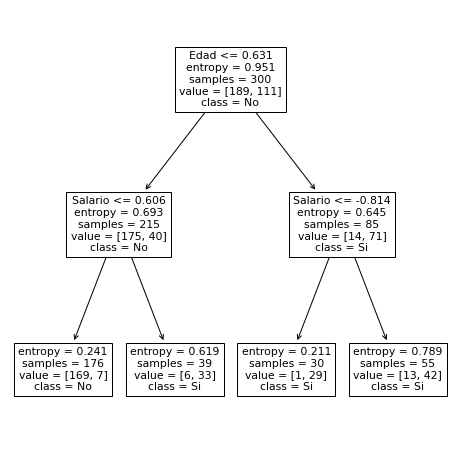

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(modelo_ad, feature_names = variables, class_names= compra, ax=ax)

### Predicción

In [ ]:
prediccion_ad = modelo_ad.predict([[1,0,24,19000],[0,1,24,91000],[1,0,45,19000]])

In [ ]:
print(prediccion_ad)

['Si' 'Si' 'Si']


In [ ]:
X_test

array([[ 1.02020406, -1.02020406, -0.80480212,  0.50496393],
       [-0.98019606,  0.98019606, -0.01254409, -0.5677824 ],
       [ 1.02020406, -1.02020406, -0.30964085,  0.1570462 ],
       [-0.98019606,  0.98019606, -0.80480212,  0.27301877],
       [-0.98019606,  0.98019606, -0.30964085, -0.5677824 ],
       [ 1.02020406, -1.02020406, -1.10189888, -1.43757673],
       [-0.98019606,  0.98019606, -0.70576986, -1.58254245],
       [ 1.02020406, -1.02020406, -0.21060859,  2.15757314],
       [-0.98019606,  0.98019606, -1.99318916, -0.04590581],
       [ 1.02020406, -1.02020406,  0.8787462 , -0.77073441],
       [ 1.02020406, -1.02020406, -0.80480212, -0.59677555],
       [-0.98019606,  0.98019606, -1.00286662, -0.42281668],
       [ 1.02020406, -1.02020406, -0.11157634, -0.42281668],
       [ 1.02020406, -1.02020406,  0.08648817,  0.21503249],
       [ 1.02020406, -1.02020406, -1.79512465,  0.47597078],
       [-0.98019606,  0.98019606, -0.60673761,  1.37475825],
       [ 1.02020406, -1.

In [ ]:
prediccion_ad_2 = modelo_ad.predict(X_test)

In [ ]:
print(prediccion_ad_2)

['No' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'No' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No'
 'No' 'No' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'No' 'No'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si'
 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'No' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No'
 'Si' 'No' 'No' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'No' 'Si'
 'Si' 'Si']


## XGBoost

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
XGBoost = XGBClassifier()

In [ ]:
XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_XGBoost = XGBoost.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_XGBoost)
print(mc)

[[64  4]
 [ 3 29]]


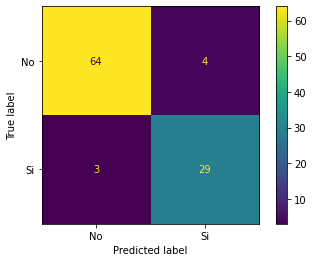

In [ ]:
metrics.plot_confusion_matrix(XGBoost,X_test,y_test)

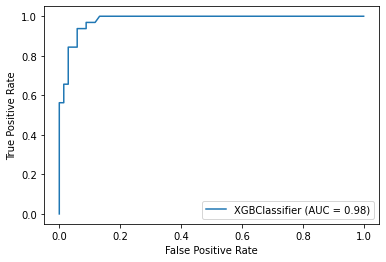

In [ ]:
metrics.plot_roc_curve(XGBoost,X_test,y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_XGBoost)
print(reporte)

              precision    recall  f1-score   support

          No       0.96      0.94      0.95        68
          Si       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



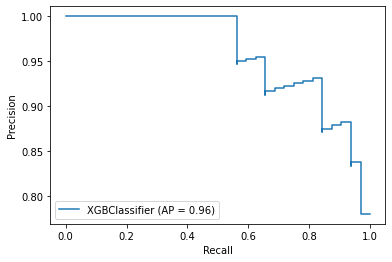

In [ ]:
metrics.plot_precision_recall_curve(XGBoost,X_test,y_test)

### Guardando el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_xgboost.pkl"

In [ ]:
file = open(path, "wb")
pickle.dump(XGBoost, file)

### Leyendo el modelo

In [ ]:
file = open(path, "rb")
modelo_XGBoost = pickle.load(file)

### Visualización XGBoost

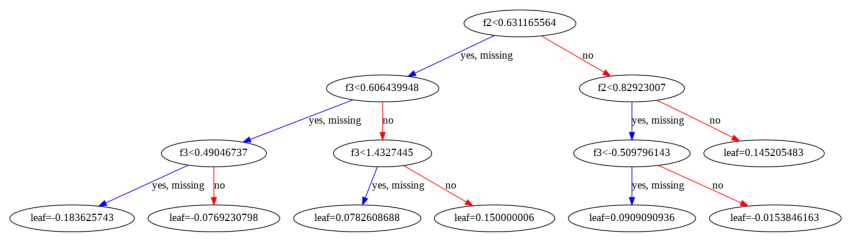

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
xgb.plot_tree(modelo_XGBoost, ax=ax)

### Predicción

In [ ]:
prediccion_XGBoost = modelo_XGBoost.predict([[1,0,24,19000],[0,1,24,91000],[1,0,45,19000]])

In [ ]:
print(prediccion_XGBoost)

['Si' 'Si' 'Si']


## Algoritmo Bosque Aleatorio

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 10, max_depth = 4, criterion = "entropy", random_state = 0)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_rfc = rfc.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_rfc)
print(mc)

[[64  4]
 [ 2 30]]


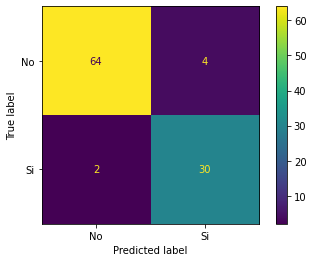

In [ ]:
metrics.plot_confusion_matrix(rfc,X_test,y_test)

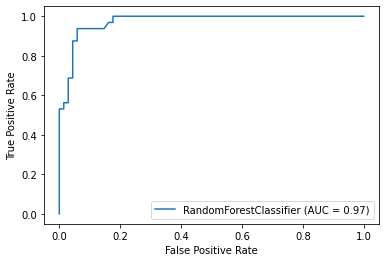

In [ ]:
metrics.plot_roc_curve(rfc,X_test,y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_rfc)
print(reporte)

              precision    recall  f1-score   support

          No       0.97      0.94      0.96        68
          Si       0.88      0.94      0.91        32

    accuracy                           0.94       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.94      0.94       100



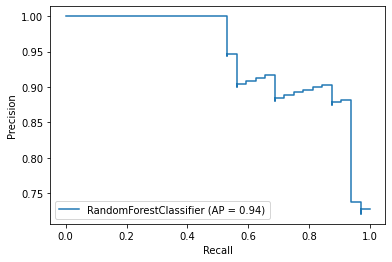

In [ ]:
metrics.plot_precision_recall_curve(rfc,X_test,y_test)

### Guardando el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_rfc.pkl"
file = open(path, "wb")
pickle.dump(rfc, file)

### Leyendo el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_rfc.pkl"
file = open(path, "rb")
modelo_rfc = pickle.load(file)

### Predicción

In [ ]:
prediccion_rfc = modelo_rfc.predict([[1,0,24,19000],[0,1,24,91000],[1,0,45,19000]])

In [ ]:
print(prediccion_rfc)

['Si' 'Si' 'Si']


## Algoritmo Bayes ingenuo

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
bayes = GaussianNB()

In [ ]:
bayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_bayes = bayes.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_bayes)
print(mc)

[[66  2]
 [ 6 26]]


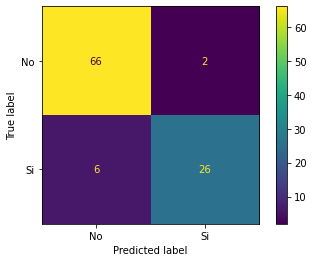

In [ ]:
metrics.plot_confusion_matrix(bayes,X_test,y_test)

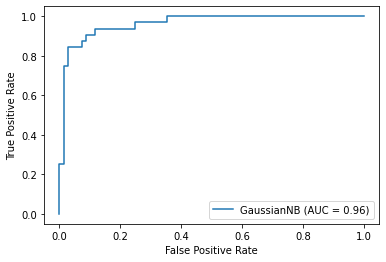

In [ ]:
metrics.plot_roc_curve(bayes,X_test,y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_bayes)
print(reporte)

              precision    recall  f1-score   support

          No       0.92      0.97      0.94        68
          Si       0.93      0.81      0.87        32

    accuracy                           0.92       100
   macro avg       0.92      0.89      0.90       100
weighted avg       0.92      0.92      0.92       100



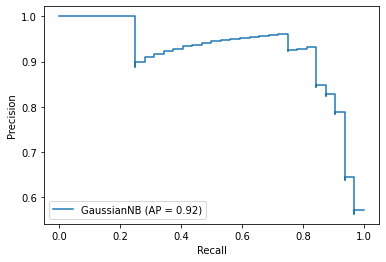

In [ ]:
metrics.plot_precision_recall_curve(bayes,X_test,y_test)

### Guardando el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_bayes.pkl"
file = open(path, "wb")
pickle.dump(bayes, file)

### Leyendo el modelo

In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_bayes.pkl"
file = open(path, "rb")
modelo_bayes = pickle.load(file)

### Predicción

In [ ]:
prediccion_bayes = modelo_bayes.predict([[1,0,24,19000],[0,1,24,91000],[1,0,45,19000]])

In [ ]:
print(prediccion_bayes)

['Si' 'Si' 'Si']
